In [ ]:
pip install pyet

In [ ]:
import pyet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
X_data = pd.read_csv('/content/drive/MyDrive/Universidad/Evapotranspiration-Prediction-2022/data_processing/weather_forecast_data/processed_forecast_historical/1-Day(s)-forecast-Horizon.csv',index_col='date')
y_data = pd.read_csv('/content/drive/MyDrive/Universidad/Evapotranspiration-Prediction-2022/data_processing/data/Eto-Pudahuel.csv',index_col='Data')
X_data = X_data.interpolate()
y_data = y_data.interpolate()

In [ ]:
X_data = X_data[['tmin','tmax','temp','rh','rhmin','rhmax','wind','cod_wc','ra']]

In [ ]:
X_array = np.array(X_data)

In [ ]:
y_data = y_data['01-01-2021':'01-06-2022']
y_array = np.array(y_data)

In [ ]:
X_array

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, shuffle=False)

In [ ]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.6095897884182306

In [ ]:
r2_score(y_test,eto_form)

0.6609948330439598

In [ ]:
ETO_formula = pd.read_csv('/content/drive/MyDrive/Universidad/Evapotranspiration-Prediction-2022/data_processing/weather_forecast_data/processed_forecast_historical/1-Day(s)-forecast-Horizon.csv',index_col='date')

In [ ]:
ETO_formula = ETO_formula[['et0_pmfao56_raxwc']]

In [ ]:
eto_form = np.array(ETO_formula[-104:])

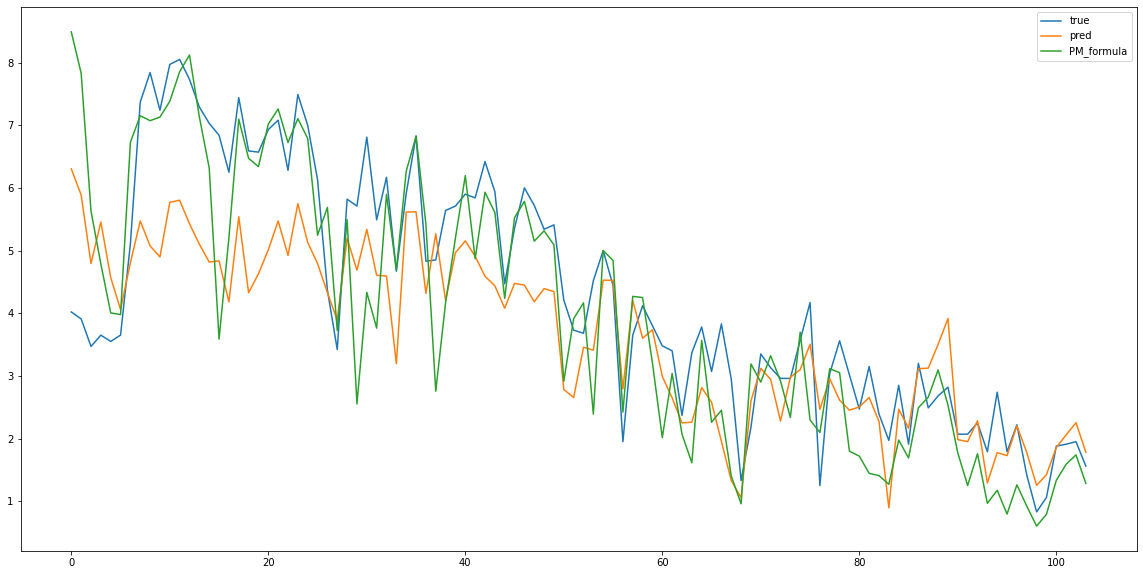

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.plot(y_test,label='true')
plt.plot(y_pred,label='pred')
plt.plot(eto_form,label='PM_formula')
plt.legend()